# Izhikevich Neuron Model

The Izhikevich model is a computationally efficient neuron model that can reproduce diverse firing patterns observed in real neurons by combining the biophysical accuracy of Hodgkin-Huxley-type dynamics with the computational efficiency of integrate-and-fire neurons.. Despite having only two state variables and a small number of parameters, the model can generate a rich variety of neuronal behaviors including regular spiking, bursting, chattering, and more.

## Key Properties

1. **Diverse Firing Patterns**: Can reproduce at least 20 different firing patterns observed in cortical neurons
2. **Computational Efficiency**: Requires only 13 floating-point operations per 1 ms simulation
3. **Biophysical Plausibility**: Captures dynamics of spike initiation through a quadratic term
4. **Versatility**: Can model both excitatory and inhibitory neurons with appropriate parameter tuning
5. **Recovery Variable**: Provides negative feedback to membrane potential for accommodating dynamics

## Mathematical Description

The model is described by two coupled differential equations:

dv/dt = 0.04v² + 5v + 140 - u + I

du/dt = a(bv - u)

When v ≥ 30 mV:
  • v is reset to c
  • u is incremented: u = u + d

Parameters:
- v: Membrane potential [mV]
- u: Recovery variable that provides negative feedback to v
- a: Time scale of the recovery variable (typically 0.02-0.1)
- b: Sensitivity of recovery variable to subthreshold membrane fluctuations (typically 0.2-0.25)
- c: After-spike reset value of membrane potential (typically -65 to -50 mV)
- d: After-spike reset value of recovery variable (typically 2-8)
- I: Injected current [pA]

Different parameter sets produce different neuronal firing patterns:
- Regular Spiking (RS): a=0.02, b=0.2, c=-65, d=8
- Intrinsically Bursting (IB): a=0.02, b=0.2, c=-55, d=4
- Chattering (CH): a=0.02, b=0.2, c=-50, d=2
- Fast Spiking (FS): a=0.1, b=0.2, c=-65, d=2
- Low-Threshold Spiking (LTS): a=0.02, b=0.25, c=-65, d=2
- Resonator (RZ): a=0.1, b=0.25, c=-65, d=2

State Variables:
- v: Membrane potential (initialize at -65 mV)
- u: Recovery variable (initialize at b×v)

Time-related variables:
- dt: Time step for numerical integration (typically 0.05-0.1 ms)
- t: Current simulation time
- tmax: Maximum simulation time

## Algorithm

1. Initialize state variables
   - v = -65 (or c)
   - u = b×v
   - Create empty list for spike times

2. For each time step from t=0 to t=tmax:
   
   a. Check if spike threshold is reached
      - If v ≥ 30:
        • Record spike time
        • Reset membrane potential: v = c
        • Update recovery variable: u = u + d
   
   b. Compute derivative terms
      - dv/dt = 0.04v² + 5v + 140 - u + I
      - du/dt = a(bv - u)
   
   c. Update state variables using Euler method
      - v = v + dv/dt × dt
      - u = u + du/dt × dt
   
   d. Store variables for plotting
      - Record v, u at current time step
   
   e. Increment time: t = t + dt

3. Analyze and visualize results
   - Plot membrane potential (v) vs time
   - Plot recovery variable (u) vs time
   - Analyze spike patterns and statistics (interspike intervals, firing rate)

## Characteristic Behaviors

1. **Regular Spiking (RS)**: Neuron fires single spikes with adaptation (decreasing frequency)
2. **Intrinsically Bursting (IB)**: Initial burst followed by regular spiking
3. **Chattering (CH)**: Rhythmic bursting with high-frequency spikes within each burst
4. **Fast Spiking (FS)**: High-frequency firing with minimal adaptation, typical of inhibitory interneurons
5. **Low-Threshold Spiking (LTS)**: Burst firing triggered by lower threshold, often after hyperpolarization
6. **Resonator (RZ)**: Preferential response to inputs at specific frequencies
7. **Integrator**: Fire in response to steady input regardless of frequency
8. **Rebound Spike/Burst**: Firing after release from inhibition
9. **Bistability**: Coexistence of resting and tonic spiking states
10. **Accommodation**: Failure to generate spikes in response to slowly increasing current

## Biological Mechanisms Represented

The simplified dynamics of the Izhikevich model represent:
- Fast sodium and potassium currents for spike generation (quadratic term)
- Slow potassium currents for spike adaptation (u variable)
- After-spike reset mechanism (parameters c and d)
- Subthreshold resonance properties (parameter b)
- Recovery dynamics (parameter a)
- Various voltage-gated currents that contribute to diverse firing patterns

## Applications

The Izhikevich model is particularly useful for:
- Large-scale simulations of cortical networks due to computational efficiency
- Modeling diverse neuronal types within the same simulation framework
- Studying network dynamics with heterogeneous neuronal populations
- Educational purposes to demonstrate different firing patterns
- Fitting experimental data when biophysical detail is not required
- Investigating how parameter changes affect neuronal excitability
- Systems that need biologically plausible dynamics with minimal computational cost

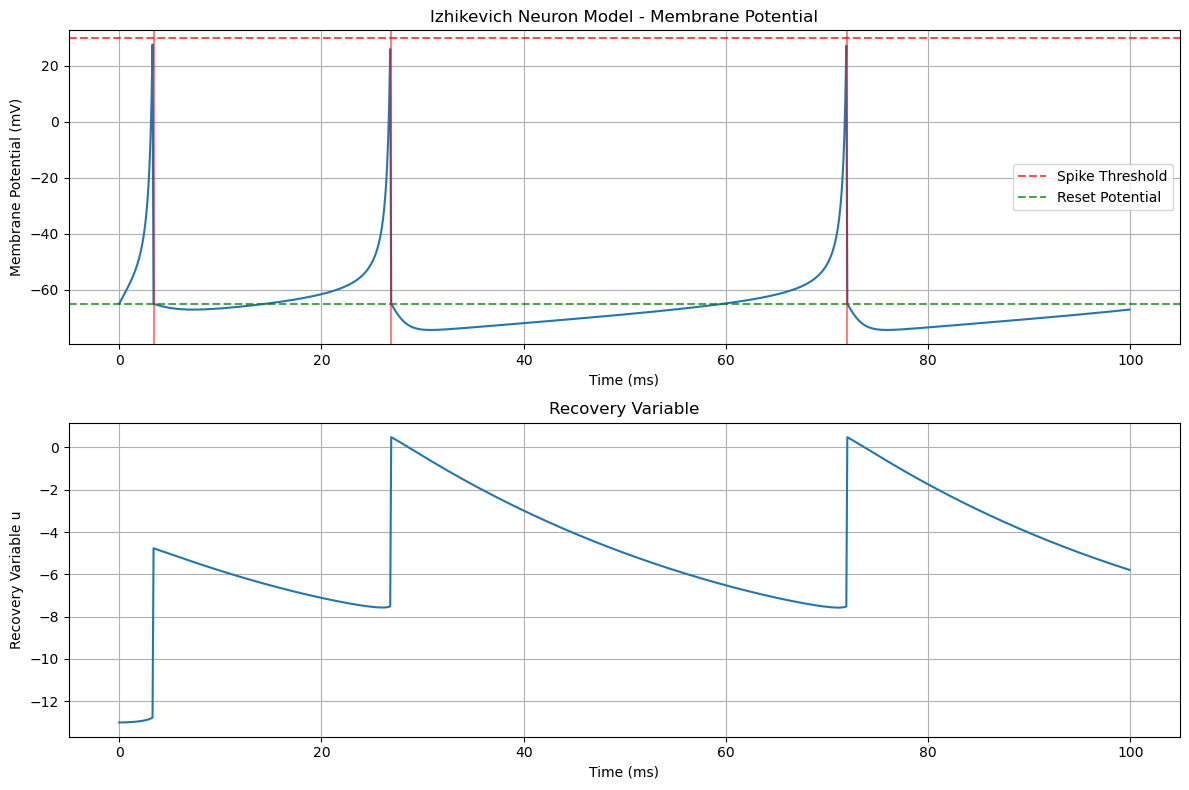

In [8]:
class Izhikevich():
    def __init__(self, a, b, c, d, v_init, I, time_steps):
        self.a = a          # Recovery time constant
        self.b = b          # Sensitivity of recovery variable
        self.c = c          # Post-spike reset value for v
        self.d = d          # Post-spike reset increment for u
        self.v_init = v_init # Initial membrane potential
        self.I = I          # Input current
        self.time_steps = time_steps
    
    def simulate(self):
        # Initialize arrays for storing voltage, recovery variable, and spike times
        v = [self.v_init]  # Membrane potential
        u = [self.b * self.v_init]  # Recovery variable
        spikes = []
        
        dt = self.time_steps[1] - self.time_steps[0]  # Time step size
        
        # Simulate for each time step
        for t_idx, t in enumerate(self.time_steps[:-1]):
            # Current values
            v_current = v[-1]
            u_current = u[-1]
            
            # Calculate next values using Euler's method
            # dv/dt = 0.04v² + 5v + 140 - u + I
            # du/dt = a(bv - u)
            v_next = v_current + dt * (0.04 * v_current**2 + 5 * v_current + 140 - u_current + self.I)
            u_next = u_current + dt * self.a * (self.b * v_current - u_current)
            
            # Check for spike (v >= 30 mV is the threshold in the Izhikevich model)
            if v_next >= 30:
                spikes.append(t + dt)
                v_next = self.c
                u_next = u_current + self.d
            
            v.append(v_next)
            u.append(u_next)
        
        return v, u, spikes
    
    def plot_results(self, v, u, spikes):
        plt.figure(figsize=(12, 8))
        
        # Plot membrane potential
        plt.subplot(2, 1, 1)
        plt.plot(self.time_steps, v)
        plt.axhline(y=30, color='r', linestyle='--', alpha=0.7, label='Spike Threshold')
        plt.axhline(y=self.c, color='g', linestyle='--', alpha=0.7, label='Reset Potential')
        
        # Plot spikes as vertical lines
        for spike in spikes:
            plt.axvline(x=spike, color='r', linestyle='-', alpha=0.5)
        
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.title('Izhikevich Neuron Model - Membrane Potential')
        plt.legend()
        plt.grid(True)
        
        # Plot recovery variable
        plt.subplot(2, 1, 2)
        plt.plot(self.time_steps, u)
        plt.xlabel('Time (ms)')
        plt.ylabel('Recovery Variable u')
        plt.title('Recovery Variable')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Example usage for the Izhikevich model
t_max = 100  # ms
dt = 0.1     # ms
time_steps = np.arange(0, t_max, dt)

# Parameters for regular spiking (RS) neuron
neuron = Izhikevich(
    a=0.02,     # Recovery time constant
    b=0.2,      # Sensitivity of recovery variable
    c=-65,      # Post-spike reset value for v
    d=8,        # Post-spike reset increment for u
    v_init=-65, # Initial membrane potential
    I=10,       # Input current
    time_steps=time_steps
)

# Run simulation
v, u, spikes = neuron.simulate()

# Plot results - this will create just one figure with membrane potential and recovery variable
neuron.plot_results(v, u, spikes)